In [4]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import requests

# To unzip the edf_dataset
import zipfile
import os

# EDFlib and Data Preprocesing module
from mne.preprocessing import ICA, create_eog_epochs
import mne
from pyedflib import highlevel
import pyedflib as plib

In [5]:
# Directory containing the EDF files
edf_directory = "../edf_dataset_2"

# Initialize counters
healthy_count = 0
mdd_count = 0
task_count = 0
eo_count = 0
ec_count = 0

# Loop through all files in the specified directory
for filename in os.listdir(edf_directory):
    if filename.endswith('.edf'):  # Ensure we only process EDF files
        # Count healthy samples (H)
        if filename.startswith('H_'):
            healthy_count += 1

        # Count MDD samples
        elif filename.startswith('MDD_'):
            mdd_count += 1

        # Count task samples
        if 'TASK' in filename:
            task_count += 1

        # Count EO samples
        if 'EO' in filename:
            eo_count += 1

        # Count EC samples
        if 'EC' in filename:
            ec_count += 1

# Print the results
print(f"Healthy samples (H): {healthy_count}")
print(f"MDD samples: {mdd_count}")
print(f"Task samples: {task_count}")
print(f"EO samples: {eo_count}")
print(f"EC samples: {ec_count}")

Healthy samples (H): 85
MDD samples: 95
Task samples: 61
EO samples: 61
EC samples: 58


In [6]:
import random

# Directory containing the EDF files
edf_directory = "./edf_dataset_2"

# Initialize lists for each category
healthy_task_files = []
healthy_ec_files = []
healthy_eo_files = []
mdd_task_files = []
mdd_ec_files = []
mdd_eo_files = []

# Loop through all files in the specified directory
for filename in os.listdir(edf_directory):
    if filename.endswith('.edf'):  # Ensure we only process EDF files
        # Categorize files based on their names
        if filename.startswith('H'):
            if filename.endswith('_TASK.edf'):
                healthy_task_files.append(filename)
            elif filename.endswith('EC.edf'):
                healthy_ec_files.append(filename)
            elif filename.endswith('EO.edf'):
                healthy_eo_files.append(filename)
        elif filename.startswith('MDD_'):
            if filename.endswith('TASK.edf'):
                mdd_task_files.append(filename)
            elif filename.endswith('EC.edf'):
                mdd_ec_files.append(filename)
            elif filename.endswith('EO.edf'):
                mdd_eo_files.append(filename)

print(f"Healthy Sample with Task: {len(healthy_task_files)}")
print(f"Healthy Sample with Eyes Closed: {len(healthy_ec_files)}")
print(f"Healthy Sample with Eyes Open: {len(healthy_eo_files)}")
print(f"Mild Depressive Disorder Sample with Task: {len(mdd_task_files)}")
print(
    f"Major Depressive Disorder Sample with Eyes Closed: {len(mdd_ec_files)}")
print(f"Major Depressive Disorder Sample with Eyes Open: {len(mdd_eo_files)}")

Healthy Sample with Task: 28
Healthy Sample with Eyes Closed: 28
Healthy Sample with Eyes Open: 29
Mild Depressive Disorder Sample with Task: 33
Major Depressive Disorder Sample with Eyes Closed: 30
Major Depressive Disorder Sample with Eyes Open: 32


In [7]:
# Function to pick a random file from a list
def pick_random_file(file_list):
    return random.choice(file_list) if file_list else None


# Pick one file from each specified combination and store in variables
healthy_task_file = pick_random_file(healthy_task_files)
healthy_ec_file = pick_random_file(healthy_ec_files)
healthy_eo_file = pick_random_file(healthy_eo_files)
mdd_task_file = pick_random_file(mdd_task_files)
mdd_ec_file = pick_random_file(mdd_ec_files)
mdd_eo_file = pick_random_file(mdd_eo_files)

# Now you can access these variables directly
print(f"Healthy and Task: {healthy_task_file}")
print(f"Healthy and EC: {healthy_ec_file}")
print(f"Healthy and EO: {healthy_eo_file}")
print(f"MDD and Task: {mdd_task_file}")
print(f"MDD and EC: {mdd_ec_file}")
print(f"MDD and EO: {mdd_eo_file}")


Healthy and Task: H_S23_TASK.edf
Healthy and EC: H_S29_EC.edf
Healthy and EO: H_S26_EO.edf
MDD and Task: MDD_S15_TASK.edf
MDD and EC: MDD_S18_EC.edf
MDD and EO: MDD_S24_EO.edf


In [8]:
import matplotlib.pyplot as plt
import os
from datetime import datetime
from pyedflib import highlevel, EdfReader  # Ensure you have the correct import

# Function to extract data from an EDF file


def extract_data_from_edf(edf_file_path):
    try:
        with EdfReader(edf_file_path) as f:
            # Get the number of signals
            n = f.signals_in_file
            print(f"Number of signals: {n}")

            # Read the signal labels
            signal_labels = f.getSignalLabels()
            print(f"Signal labels: {signal_labels}")

            # Get the data header
            header = f.getSignalHeaders()
            print(f"Data Header: {header}")

            # This library only applies for the healthy samples
            gender = f.getSex()
            print(f"Patients gender: {gender}")

            experiment_date = f.getStartdatetime()
            print(f"Experiment date: {experiment_date}")
            birthday = f.getBirthdate()
            print(f"Birth date: {birthday}")
            # Calculate age
            # Adjust format if necessary
            birth_date = datetime.strptime(birthday, '%d %b %Y')
            # Calculate age in years
            age = (experiment_date - birth_date).days // 365
            print(f"Age: {age}")  # Print age instead of birthday

            return n, signal_labels, header, gender, age  # Return age as well
    except OSError as e:
        print(f"OSError processing {edf_file_path}: {e}")
        # Return None for all values in case of OSError
        return None, None, None, None, None
    except Exception as e:
        print(f"Error processing {edf_file_path}: {e}")
        # Return None for all values in case of other errors
        return None, None, None, None, None

In [9]:
def visualize_gender_distribution(edf_directory):
    healthy_gender_count = {'Male': 0, 'Female': 0}
    mdd_gender_count = {'Male': 0, 'Female': 0}
    failed_files = []  # Track files that couldn't be processed

    # Create dictionaries to store all files for each subject
    healthy_subjects = {}  # {subject_id: [list of files]}
    mdd_subjects = {}     # {subject_id: [list of files]}

    # First pass: organize files by subject
    for filename in os.listdir(edf_directory):
        if filename.endswith('.edf'):
            subject_id = filename.split('_')[1]
            if filename.startswith('H_'):
                if subject_id not in healthy_subjects:
                    healthy_subjects[subject_id] = []
                healthy_subjects[subject_id].append(filename)
            elif filename.startswith('MDD_'):
                if subject_id not in mdd_subjects:
                    mdd_subjects[subject_id] = []
                mdd_subjects[subject_id].append(filename)

    # Second pass: try to get gender for each subject
    for subject_id, files in healthy_subjects.items():
        gender_found = False
        print(f"\nProcessing Healthy subject {subject_id}:")
        for filename in files:
            file_path = os.path.join(edf_directory, filename)
            result = extract_data_from_edf(file_path)
            print(
                f"- File: {filename}, Result: {result[3] if result[4] is not None else 'Failed'}")

            if result[4] is not None:
                gender = result[3]
                if gender in healthy_gender_count:
                    healthy_gender_count[gender] += 1
                    gender_found = True
                break  # Stop after finding first valid gender
            else:
                failed_files.append(filename)

        if not gender_found:
            print(f"WARNING: No gender found for healthy subject {subject_id}")

    for subject_id, files in mdd_subjects.items():
        gender_found = False
        print(f"\nProcessing MDD subject {subject_id}:")
        for filename in files:
            file_path = os.path.join(edf_directory, filename)
            result = extract_data_from_edf(file_path)
            print(
                f"- File: {filename}, Result: {result[3] if result[4] is not None else 'Failed'}")

            if result[4] is not None:
                gender = result[3]
                if gender in mdd_gender_count:
                    mdd_gender_count[gender] += 1
                    gender_found = True
                break  # Stop after finding first valid gender
            else:
                failed_files.append(filename)

        if not gender_found:
            print(f"WARNING: No gender found for MDD subject {subject_id}")

    # Print summary
    print("\nSummary:")
    print(f"Total Healthy subjects: {len(healthy_subjects)}")
    print(f"Total MDD subjects: {len(mdd_subjects)}")
    print("\nGender Distribution:")
    print("Healthy counts:", healthy_gender_count)
    print("MDD counts:", mdd_gender_count)

    print("\nFailed to process these files:")
    for file in failed_files:
        print(f"- {file}")

    # Rest of the plotting code remains the same...
    labels = ['Male', 'Female']
    healthy_counts = [healthy_gender_count['Male'],
                      healthy_gender_count['Female']]
    mdd_counts = [mdd_gender_count['Male'], mdd_gender_count['Female']]

    x = range(len(labels))
    width = 0.35

    plt.figure(figsize=(10, 6))
    plt.bar(x, healthy_counts, width, label='Healthy',
            color='blue', alpha=0.7, edgecolor='black')
    plt.bar([p + width for p in x], mdd_counts, width, label='MDD',
            color='orange', alpha=0.7, edgecolor='black')

    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.title('Gender Distribution: Healthy vs MDD')
    plt.xticks([p + width/2 for p in x], labels)
    plt.legend()

    for i, v in enumerate(healthy_counts):
        plt.text(i, v, str(v), ha='center', va='bottom')
    for i, v in enumerate(mdd_counts):
        plt.text(i + width, v, str(v), ha='center', va='bottom')

    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()


Processing Healthy subject S4:
Number of signals: 22
Signal labels: ['EEG Fp1-LE', 'EEG F3-LE', 'EEG C3-LE', 'EEG P3-LE', 'EEG O1-LE', 'EEG F7-LE', 'EEG T3-LE', 'EEG T5-LE', 'EEG Fz-LE', 'EEG Fp2-LE', 'EEG F4-LE', 'EEG C4-LE', 'EEG P4-LE', 'EEG O2-LE', 'EEG F8-LE', 'EEG T4-LE', 'EEG T6-LE', 'EEG Cz-LE', 'EEG Pz-LE', 'EEG A2-A1', 'EEG 23A-23R', 'EEG 24A-24R']
Data Header: [{'label': 'EEG Fp1-LE', 'dimension': 'uV', 'sample_rate': 256.0, 'sample_frequency': 256.0, 'physical_max': 3277.0, 'physical_min': -3277.0, 'digital_max': 32767, 'digital_min': -32768, 'prefilter': 'HP:0.5Hz LP:80Hz', 'transducer': ''}, {'label': 'EEG F3-LE', 'dimension': 'uV', 'sample_rate': 256.0, 'sample_frequency': 256.0, 'physical_max': 3277.0, 'physical_min': -3277.0, 'digital_max': 32767, 'digital_min': -32768, 'prefilter': 'HP:0.5Hz LP:80Hz', 'transducer': ''}, {'label': 'EEG C3-LE', 'dimension': 'uV', 'sample_rate': 256.0, 'sample_frequency': 256.0, 'physical_max': 3277.0, 'physical_min': -3277.0, 'digital_

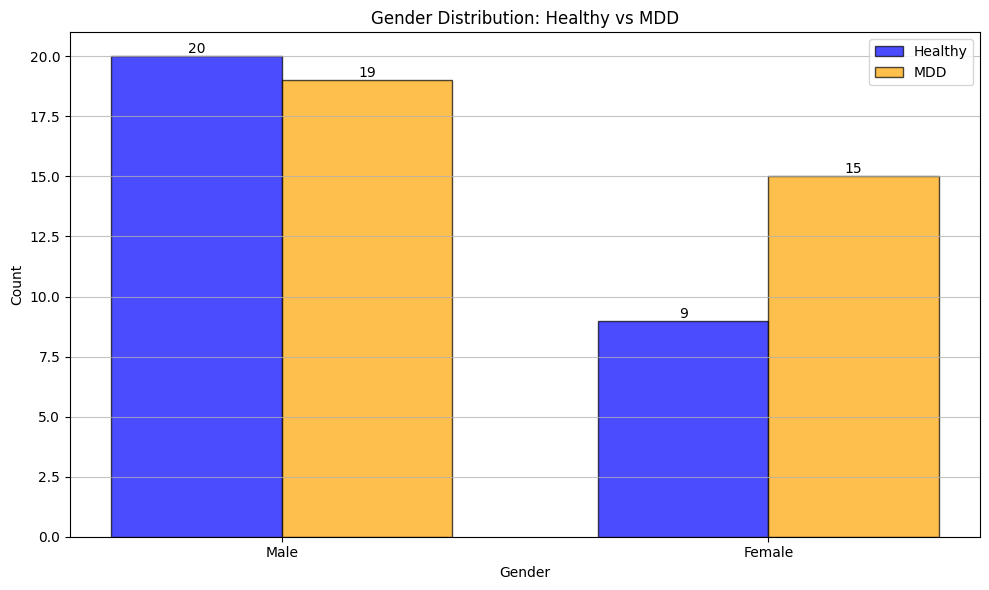

In [10]:
edf_directory_2 = "./edf_dataset_2"
visualize_gender_distribution(edf_directory_2)

In [26]:
# Extract data for each selected file and store in variables
healthy_task_data = extract_data_from_edf(
    os.path.join(edf_directory, healthy_task_file))
healthy_ec_data = extract_data_from_edf(
    os.path.join(edf_directory, healthy_ec_file))
healthy_eo_data = extract_data_from_edf(
    os.path.join(edf_directory, healthy_eo_file))
mdd_task_data = extract_data_from_edf(
    os.path.join(edf_directory, mdd_task_file))
mdd_ec_data = extract_data_from_edf(os.path.join(edf_directory, mdd_ec_file))
mdd_eo_data = extract_data_from_edf(os.path.join(edf_directory, mdd_eo_file))

# Now you can access the extracted data variables
print("Healthy Task Data:", healthy_task_data)
print("Healthy EC Data:", healthy_ec_data)
print("Healthy EO Data:", healthy_eo_data)
print("MDD Task Data:", mdd_task_data)
print("MDD EC Data:", mdd_ec_data)
print("MDD EO Data:", mdd_eo_data)

Number of signals: 22
Signal labels: ['EEG Fp1-LE', 'EEG F3-LE', 'EEG C3-LE', 'EEG P3-LE', 'EEG O1-LE', 'EEG F7-LE', 'EEG T3-LE', 'EEG T5-LE', 'EEG Fz-LE', 'EEG Fp2-LE', 'EEG F4-LE', 'EEG C4-LE', 'EEG P4-LE', 'EEG O2-LE', 'EEG F8-LE', 'EEG T4-LE', 'EEG T6-LE', 'EEG Cz-LE', 'EEG Pz-LE', 'EEG A2-A1', 'EEG 23A-23R', 'EEG 24A-24R']
Data Header: [{'label': 'EEG Fp1-LE', 'dimension': 'uV', 'sample_rate': 256.0, 'sample_frequency': 256.0, 'physical_max': 3277.0, 'physical_min': -3277.0, 'digital_max': 32767, 'digital_min': -32768, 'prefilter': 'HP:0.5Hz LP:80Hz', 'transducer': ''}, {'label': 'EEG F3-LE', 'dimension': 'uV', 'sample_rate': 256.0, 'sample_frequency': 256.0, 'physical_max': 3277.0, 'physical_min': -3277.0, 'digital_max': 32767, 'digital_min': -32768, 'prefilter': 'HP:0.5Hz LP:80Hz', 'transducer': ''}, {'label': 'EEG C3-LE', 'dimension': 'uV', 'sample_rate': 256.0, 'sample_frequency': 256.0, 'physical_max': 3277.0, 'physical_min': -3277.0, 'digital_max': 32767, 'digital_min': -327

In [29]:
import mne


def load_and_check_channels(file_path):
    # Load the EDF file
    raw = mne.io.read_raw_edf(file_path, preload=True)

    # Access the 'info' attribute
    info = raw.info

    # Extract subject information (birthdate and gender)
    # subject_info = info.get('subject_info', {})

    # birthdate = subject_info.get('birthday', None)
    # gender_code = subject_info.get('sex', None)

    # Gender is coded as: 0 = unknown, 1 = male, 2 = female
    # gender = {0: 'unknown', 1: 'male', 2: 'female'}.get(gender_code, 'unknown')

    # Load bad channels
    bad_channels = raw.load_bad_channels()
    all_raw_channels = raw.ch_names
    number_of_channels = len(all_raw_channels)

    # Print the information
    print(f"File path: {file_path}")
    print(f"Number of EEG Channels Used: {number_of_channels}")
    print(f"EEG Channels: {all_raw_channels}")
    print(f"Bad Channels: {bad_channels}")
    # print(f"Birthdate: {birthdate}")
    # print(f"Gender: {gender}")

    return raw

In [30]:
# Load the selected Healthy EDF files
healthy_task_data = load_and_check_channels(
    os.path.join(edf_directory, healthy_task_file))
healthy_ec_data = load_and_check_channels(
    os.path.join(edf_directory, healthy_ec_file))
healthy_eo_data = load_and_check_channels(
    os.path.join(edf_directory, healthy_eo_file))

Extracting EDF parameters from /Users/hansandreanto/Development/capstone-project/edf_dataset_2/H_S23_TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 158719  =      0.000 ...   619.996 secs...
No channels updated. Bads are: []
File path: ./edf_dataset_2/H_S23_TASK.edf
Number of EEG Channels Used: 22
EEG Channels: ['EEG Fp1-LE', 'EEG F3-LE', 'EEG C3-LE', 'EEG P3-LE', 'EEG O1-LE', 'EEG F7-LE', 'EEG T3-LE', 'EEG T5-LE', 'EEG Fz-LE', 'EEG Fp2-LE', 'EEG F4-LE', 'EEG C4-LE', 'EEG P4-LE', 'EEG O2-LE', 'EEG F8-LE', 'EEG T4-LE', 'EEG T6-LE', 'EEG Cz-LE', 'EEG Pz-LE', 'EEG A2-A1', 'EEG 23A-23R', 'EEG 24A-24R']
Bad Channels: None
Extracting EDF parameters from /Users/hansandreanto/Development/capstone-project/edf_dataset_2/H_S29_EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77567  =      0.000 ...   302.996 secs...
No channels updated. Bads are: []
File path: ./edf_dataset_2/H_

In [31]:
mdd_task_data = load_and_check_channels(
    os.path.join(edf_directory, mdd_task_file))
mdd_ec_data = load_and_check_channels(os.path.join(edf_directory, mdd_ec_file))
mdd_eo_data = load_and_check_channels(os.path.join(edf_directory, mdd_eo_file))

Extracting EDF parameters from /Users/hansandreanto/Development/capstone-project/edf_dataset_2/MDD_S15_TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 160511  =      0.000 ...   626.996 secs...
No channels updated. Bads are: []
File path: ./edf_dataset_2/MDD_S15_TASK.edf
Number of EEG Channels Used: 22
EEG Channels: ['EEG Fp1-LE', 'EEG F3-LE', 'EEG C3-LE', 'EEG P3-LE', 'EEG O1-LE', 'EEG F7-LE', 'EEG T3-LE', 'EEG T5-LE', 'EEG Fz-LE', 'EEG Fp2-LE', 'EEG F4-LE', 'EEG C4-LE', 'EEG P4-LE', 'EEG O2-LE', 'EEG F8-LE', 'EEG T4-LE', 'EEG T6-LE', 'EEG Cz-LE', 'EEG Pz-LE', 'EEG A2-A1', 'EEG 23A-23R', 'EEG 24A-24R']
Bad Channels: None
Extracting EDF parameters from /Users/hansandreanto/Development/capstone-project/edf_dataset_2/MDD_S18_EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
No channels updated. Bads are: []
File path: ./edf_datase

In [32]:
# Extract channel names from each dataset
healthy_task_channels = healthy_task_data.ch_names
healthy_ec_channels = healthy_ec_data.ch_names
healthy_eo_channels = healthy_eo_data.ch_names
mdd_task_channels = mdd_task_data.ch_names
mdd_ec_channels = mdd_ec_data.ch_names
mdd_eo_channels = mdd_eo_data.ch_names

In [33]:
# Function to compare channel names
def compare_channels(*channel_lists):
    # Convert each list of channels to a set for comparison
    channel_sets = [set(channels) for channels in channel_lists]

    # Find common channels
    common_channels = set.intersection(*channel_sets)

    # Find unique channels in each dataset
    unique_channels = {
        f"Dataset {i+1}": (channel_sets[i] - common_channels) for i in range(len(channel_sets))}

    return common_channels, unique_channels


In [34]:
# Compare channels across all datasets
common_channels, unique_channels = compare_channels(
    healthy_task_channels,
    healthy_ec_channels,
    healthy_eo_channels,
    mdd_task_channels,
    mdd_ec_channels,
    mdd_eo_channels
)

In [35]:
# Print the results
print("Common Channels Across Datasets:")
print(common_channels)

print("\nUnique Channels in Each Dataset:")
for dataset, channels in unique_channels.items():
    print(f"{dataset}: {channels}")

Common Channels Across Datasets:
{'EEG F3-LE', 'EEG T4-LE', 'EEG A2-A1', 'EEG Fz-LE', 'EEG Cz-LE', 'EEG T5-LE', 'EEG T3-LE', 'EEG C3-LE', 'EEG F8-LE', 'EEG O1-LE', 'EEG O2-LE', 'EEG Pz-LE', 'EEG F7-LE', 'EEG Fp2-LE', 'EEG T6-LE', 'EEG F4-LE', 'EEG P4-LE', 'EEG Fp1-LE', 'EEG C4-LE', 'EEG P3-LE'}

Unique Channels in Each Dataset:
Dataset 1: {'EEG 24A-24R', 'EEG 23A-23R'}
Dataset 2: {'EEG 24A-24R', 'EEG 23A-23R'}
Dataset 3: {'EEG 24A-24R', 'EEG 23A-23R'}
Dataset 4: {'EEG 24A-24R', 'EEG 23A-23R'}
Dataset 5: set()
Dataset 6: set()


In [36]:
# Function to rename channels and drop specified channels based on conditions
def process_channels(raw_data):
    """
    Process and standardize EEG channels
    """
    print(f"Initial channels: {raw_data.ch_names}")

    # Initialize a list to hold channels to drop
    channels_to_drop = []

    # Create mapping for channel renaming
    rename_map = {}
    for name in raw_data.ch_names:
        if any(x in name for x in ['23A-23R', '24A-24R', 'A2-A1']):
            channels_to_drop.append(name)
        else:
            new_name = name.replace('EEG ', '').replace('-LE', '')
            rename_map[name] = new_name

    # Drop unwanted channels
    if channels_to_drop:
        print(f"Dropping channels: {channels_to_drop}")
        raw_data.drop_channels(channels_to_drop)

    # Rename remaining channels
    raw_data.rename_channels(rename_map)

    print(f"Final channels: {raw_data.ch_names}")

    # Verify we have the expected number of channels (should be 19)
    expected_channels = ['Fp1', 'F3', 'C3', 'P3', 'O1', 'F7', 'T3', 'T5', 'Fz',
                         'Fp2', 'F4', 'C4', 'P4', 'O2', 'F8', 'T4', 'T6', 'Cz', 'Pz']

    if len(raw_data.ch_names) != len(expected_channels):
        print(
            f"Warning: Expected {len(expected_channels)} channels, got {len(raw_data.ch_names)}")
        print(f"Missing: {set(expected_channels) - set(raw_data.ch_names)}")

    return raw_data

In [1]:
import matplotlib.pyplot as plt


def plot_data(raw_data):
    # Plot the raw EEG data
    print(f"Plotting: {raw_data.filenames}")
    raw_data.plot(n_channels=17, scalings='auto', title='EDF Data', show=True)

    # Compute and plot the Power Spectral Density (PSD)
    spectrum = raw_data.compute_psd()
    spectrum.plot(average=True, picks="data", exclude="bads",
                  amplitude=False, title='Power Spectral Density (PSD)')

    plt.show()

In [38]:
# Plot the raw data
process_channels(healthy_ec_data)
process_channels(healthy_task_data)
process_channels(healthy_eo_data)
process_channels(mdd_task_data)
process_channels(mdd_ec_data)
process_channels(mdd_eo_data)

Initial channels: ['EEG Fp1-LE', 'EEG F3-LE', 'EEG C3-LE', 'EEG P3-LE', 'EEG O1-LE', 'EEG F7-LE', 'EEG T3-LE', 'EEG T5-LE', 'EEG Fz-LE', 'EEG Fp2-LE', 'EEG F4-LE', 'EEG C4-LE', 'EEG P4-LE', 'EEG O2-LE', 'EEG F8-LE', 'EEG T4-LE', 'EEG T6-LE', 'EEG Cz-LE', 'EEG Pz-LE', 'EEG A2-A1', 'EEG 23A-23R', 'EEG 24A-24R']
Dropping channels: ['EEG A2-A1', 'EEG 23A-23R', 'EEG 24A-24R']
Final channels: ['Fp1', 'F3', 'C3', 'P3', 'O1', 'F7', 'T3', 'T5', 'Fz', 'Fp2', 'F4', 'C4', 'P4', 'O2', 'F8', 'T4', 'T6', 'Cz', 'Pz']
Initial channels: ['EEG Fp1-LE', 'EEG F3-LE', 'EEG C3-LE', 'EEG P3-LE', 'EEG O1-LE', 'EEG F7-LE', 'EEG T3-LE', 'EEG T5-LE', 'EEG Fz-LE', 'EEG Fp2-LE', 'EEG F4-LE', 'EEG C4-LE', 'EEG P4-LE', 'EEG O2-LE', 'EEG F8-LE', 'EEG T4-LE', 'EEG T6-LE', 'EEG Cz-LE', 'EEG Pz-LE', 'EEG A2-A1', 'EEG 23A-23R', 'EEG 24A-24R']
Dropping channels: ['EEG A2-A1', 'EEG 23A-23R', 'EEG 24A-24R']
Final channels: ['Fp1', 'F3', 'C3', 'P3', 'O1', 'F7', 'T3', 'T5', 'Fz', 'Fp2', 'F4', 'C4', 'P4', 'O2', 'F8', 'T4', 'T6'

<RawEDF | MDD_S24_EO.edf, 19 x 76800 (300.0 s), ~11.2 MB, data loaded>

In [2]:
# Plot the raw data
plot_data(healthy_ec_data)
plot_data(mdd_ec_data)
plot_data(healthy_eo_data)
plot_data(mdd_eo_data)
plot_data(healthy_task_data)
plot_data(mdd_task_data)

NameError: name 'healthy_ec_data' is not defined

In [21]:
def ica_plot_components(raw):
    print(f"ICA Plotting: {raw.filenames}")
    montage = mne.channels.make_standard_montage('standard_1020')
    raw.set_montage(montage)

    ica = ICA(n_components=5, random_state=97,
              max_iter=800)  # Adjusted to 3 components
    ica.fit(raw)
    ica.plot_components()

ICA Plotting: ('/Users/hansandreanto/Development/capstone-project/edf_dataset_2/H_S2_EC.edf',)
Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 5 components
Fitting ICA took 0.4s.


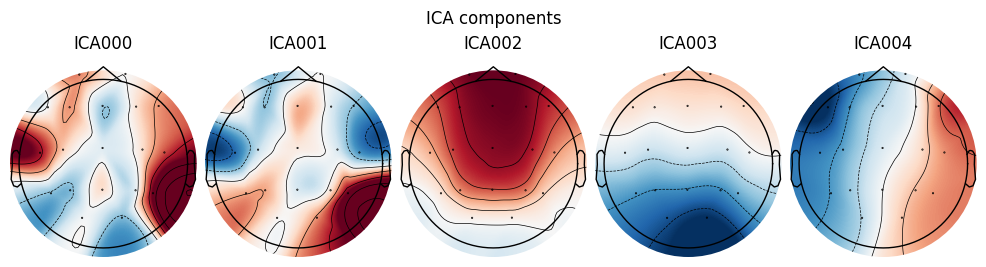

ICA Plotting: ('/Users/hansandreanto/Development/capstone-project/edf_dataset_2/MDD_S14_EC.edf',)
Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 5 components
Fitting ICA took 0.1s.


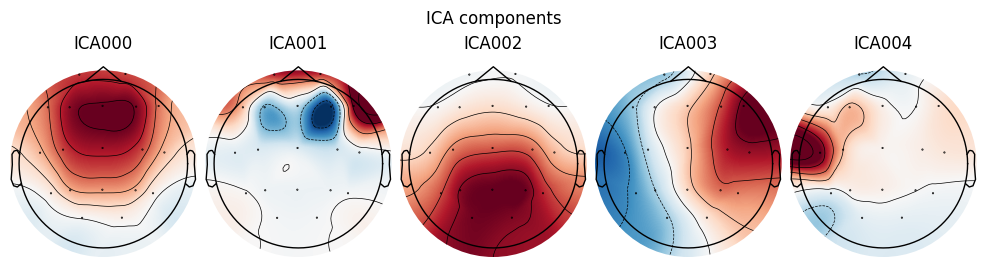

ICA Plotting: ('/Users/hansandreanto/Development/capstone-project/edf_dataset_2/H_S20_EO.edf',)
Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 5 components
Fitting ICA took 0.2s.


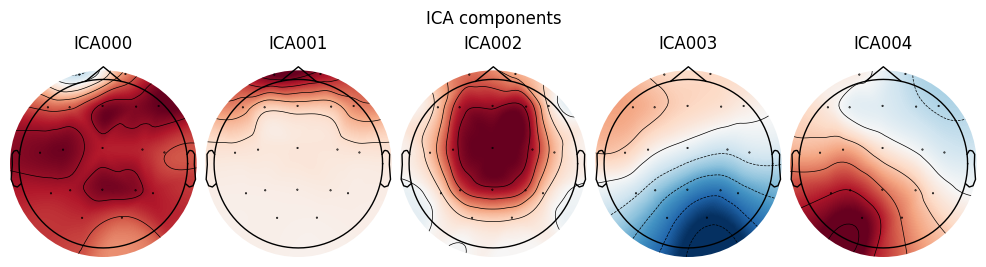

ICA Plotting: ('/Users/hansandreanto/Development/capstone-project/edf_dataset_2/MDD_S28_EO.edf',)
Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 5 components
Fitting ICA took 0.1s.


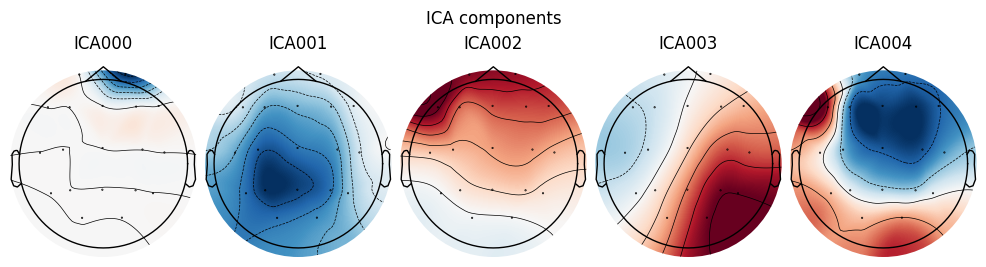

ICA Plotting: ('/Users/hansandreanto/Development/capstone-project/edf_dataset_2/H_S27_TASK.edf',)
Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 5 components
Fitting ICA took 0.2s.


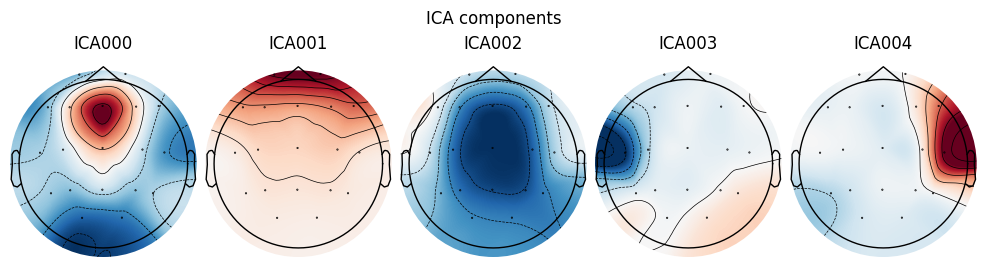

ICA Plotting: ('/Users/hansandreanto/Development/capstone-project/edf_dataset_2/MDD_S3_TASK.edf',)
Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 5 components
Fitting ICA took 0.1s.


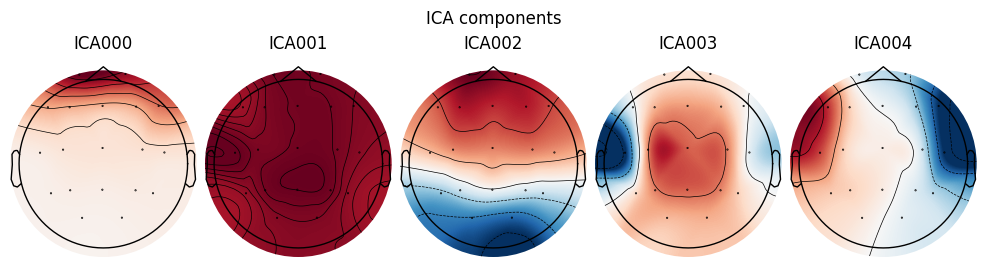

In [22]:
# Plot the ICA
ica_plot_components(healthy_ec_data)
ica_plot_components(mdd_ec_data)

ica_plot_components(healthy_eo_data)
ica_plot_components(mdd_eo_data)

ica_plot_components(healthy_task_data)
ica_plot_components(mdd_task_data)